In [ ]:
#!pip install hockey-rink

In [1]:
import pandas as pd
import hockey_rink as hr
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [8]:
df = pd.read_csv(r'C:\Users\simon\abc\snapshot1.csv', sep=';')
df


,Period,MatchClock,Timestamp,EventType,TeamStrengthType,TeamStrength,HomeGoalieOnIce,AwayGoalieOnIce,EventPosition,EventStartCoordinate,...,StartPlayerDirection3,StartPlayerDirection4,StartPlayerDirection5,StartPlayerDirection6,StartPlayerDirection7,StartPlayerDirection8,StartPlayerDirection9,StartPlayerDirection10,StartPlayerDirection11,StartPlayerDirection12
0,1,0,1_70402E+12,Faceoff,FullStrength,5v5,True,True,NeutralZone,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,1_70402E+12,PuckControl,FullStrength,5v5,True,True,NeutralZone,"-0.5,-0.7",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,1_70402E+12,PuckControl,FullStrength,5v5,True,True,NeutralZone,"-0.9,-2.9",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,1_70402E+12,PuckControl,FullStrength,5v5,True,True,NeutralZone,"-1,-2.9",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,1_70402E+12,BluelineCrossing,FullStrength,5v5,True,True,NeutralZone,"-7.2,-3.2",...,"-0.161,0.987","0.017,-1","-0.612,0.791","-0.864,-0.504","-0.39,0.921","-0.655,0.756","-0.511,-0.859","-0.983,0.183","-0.996,0.085","-0.82,0.572"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4344,3,1198,1_70403E+12,PuckControl,HomePowerplay,5v4,True,True,HomeTeamZone,"-9.6,-15",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4345,3,1198,1_70403E+12,BluelineCrossing,HomePowerplay,5v4,True,True,NeutralZone,"-7.2,-14.9",...,"0.39,-0.921","0.809,-0.588","-0.201,-0.98","-0.997,0.081","-0.782,-0.623","-0.814,-0.581","-0.096,-0.995","0.878,-0.479","-0.992,0.13",NaN
4346,3,1198,1_70403E+12,BluelineCrossing,HomePowerplay,5v4,True,True,NeutralZone,"-7.2,-10.3",...,"0.787,-0.616","0.998,0.064","0.669,0.743","0.003,1","0.044,-0.999","-0.985,-0.173","-0.503,0.864","-0.033,0.999","0.252,-0.968",NaN
4347,3,1198,1_70403E+12,PuckControl,HomePowerplay,5v4,True,True,HomeTeamZone,"-7.5,-10.5",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# each row has a column EventStartCoordinate and EventEndCoordinate which if applicable, contains the x and y coordinates of the event.
# these columns need to be split into two columns, one for x and one for y
df[['EventStartX', 'EventStartY']] = df['EventStartCoordinate'].str.split(',', expand=True)
df[['EventEndX', 'EventEndY']] = df['EventEndCoordinate'].str.split(',', expand=True)

In [10]:
# convert the columns to numeric
df['EventStartX'] = pd.to_numeric(df['EventStartX'])
df['EventStartY'] = pd.to_numeric(df['EventStartY'])
df['EventEndX'] = pd.to_numeric(df['EventEndX'])
df['EventEndY'] = pd.to_numeric(df['EventEndY'])

In [11]:
df.head()

,Period,MatchClock,Timestamp,EventType,TeamStrengthType,TeamStrength,HomeGoalieOnIce,AwayGoalieOnIce,EventPosition,EventStartCoordinate,...,StartPlayerDirection7,StartPlayerDirection8,StartPlayerDirection9,StartPlayerDirection10,StartPlayerDirection11,StartPlayerDirection12,EventStartX,EventStartY,EventEndX,EventEndY
0,1,0,1_70402E+12,Faceoff,FullStrength,5v5,True,True,NeutralZone,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,1_70402E+12,PuckControl,FullStrength,5v5,True,True,NeutralZone,"-0.5,-0.7",...,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.7,-0.9,-2.9
2,1,1,1_70402E+12,PuckControl,FullStrength,5v5,True,True,NeutralZone,"-0.9,-2.9",...,NaN,NaN,NaN,NaN,NaN,NaN,-0.9,-2.9,-1.0,-2.9
3,1,1,1_70402E+12,PuckControl,FullStrength,5v5,True,True,NeutralZone,"-1,-2.9",...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-2.9,-7.7,-3.2
4,1,1,1_70402E+12,BluelineCrossing,FullStrength,5v5,True,True,NeutralZone,"-7.2,-3.2",...,"-0.39,0.921","-0.655,0.756","-0.511,-0.859","-0.983,0.183","-0.996,0.085","-0.82,0.572",-7.2,-3.2,NaN,NaN


In [12]:
#2. Some sample plots using HockeyRink
# create a rink object
rink = hr.IIHFRink()

In [13]:
# convert the x and y coordinates to the rink coordinates using the rink.convert method
# the coordinates of the board in the hockey_rink package for the IIHF rink are length 197 and width 98.4
df['RinkX'], df['RinkY'] = rink.convert_xy(df['EventStartX'] * 3.2833 , df['EventStartY']*3.28)

In [14]:
shots = df[df['EventType'] == 'Shot']

In [15]:
crossings = df[df['EventType'] == 'BluelineCrossing']

<Axes: xlabel='RinkX', ylabel='RinkY'>

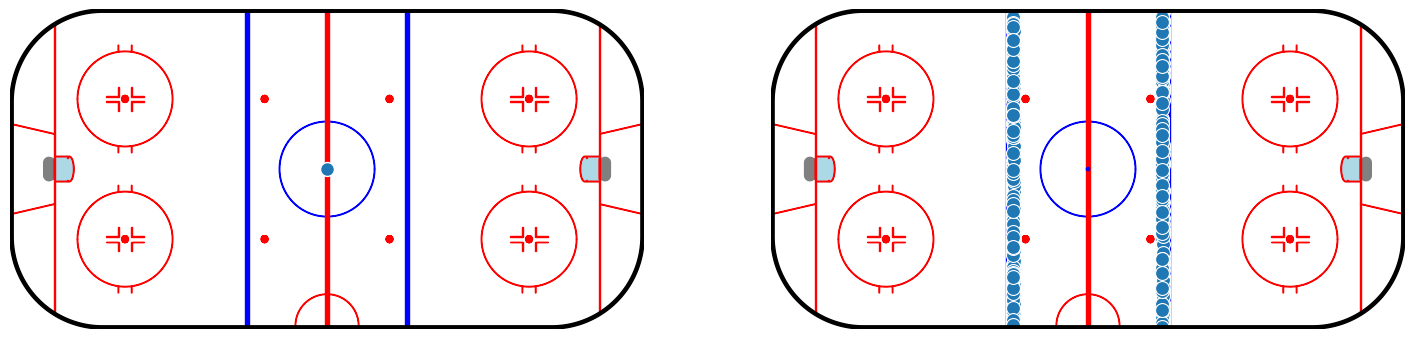

In [16]:
# plot the corssings on the rink    
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
rink.scatter("x", "y",  s=100, edgecolor="white", data=crossings, ax=axs[0])
rink.plot_fn(sns.scatterplot, x="RinkX", y="RinkY", s=100, legend=False, data=crossings, ax=axs[1])

<Axes: xlabel='RinkX', ylabel='RinkY'>

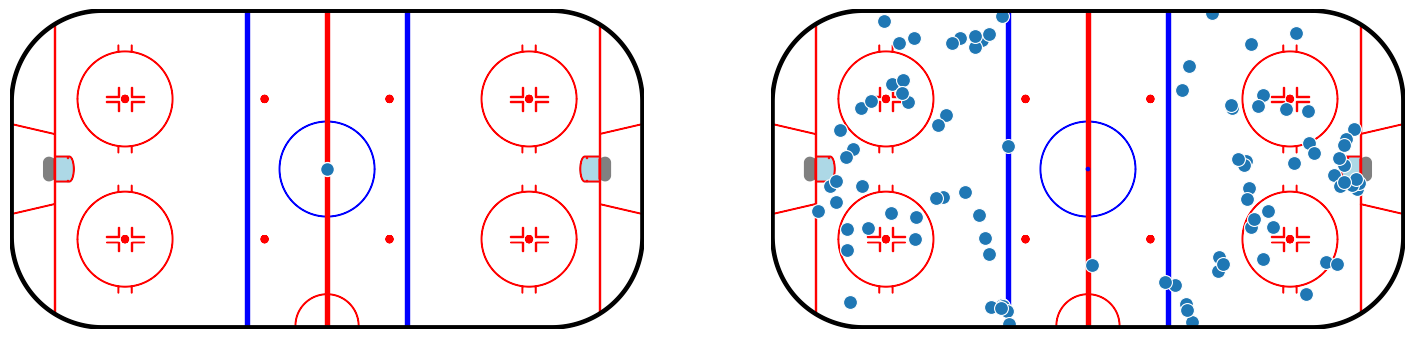

In [17]:
# plot shots on the rink    
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
rink.scatter("x", "y",  s=100, edgecolor="white", data=shots, ax=axs[0])
rink.plot_fn(sns.scatterplot, x="RinkX", y="RinkY", s=100, legend=False, data=shots, ax=axs[1])

<Axes: xlabel='RinkX', ylabel='RinkY'>

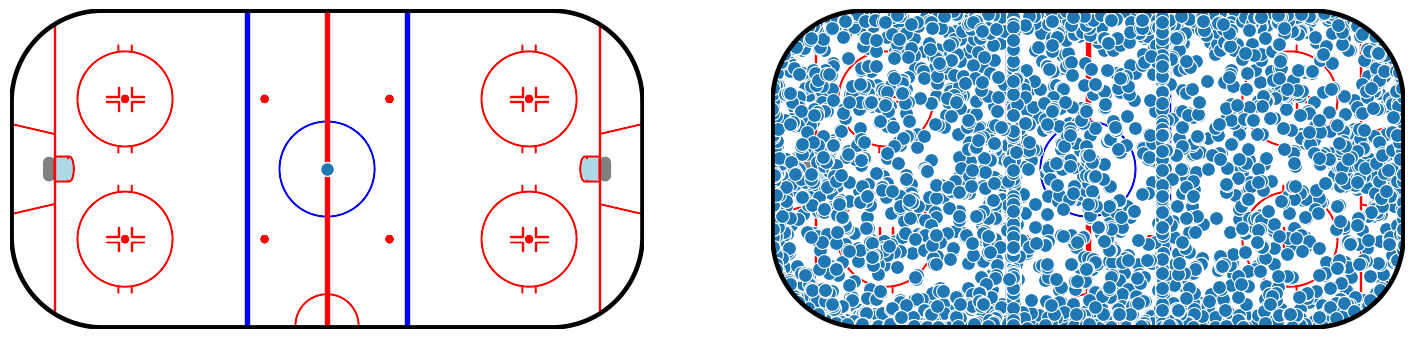

In [18]:
# plot all events on the rink    
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
rink.scatter("x", "y",  s=100, edgecolor="white", data=df, ax=axs[0])
rink.plot_fn(sns.scatterplot, x="RinkX", y="RinkY", s=100, legend=False, data=df, ax=axs[1])

<Axes: xlabel='EventStartX', ylabel='EventStartY'>

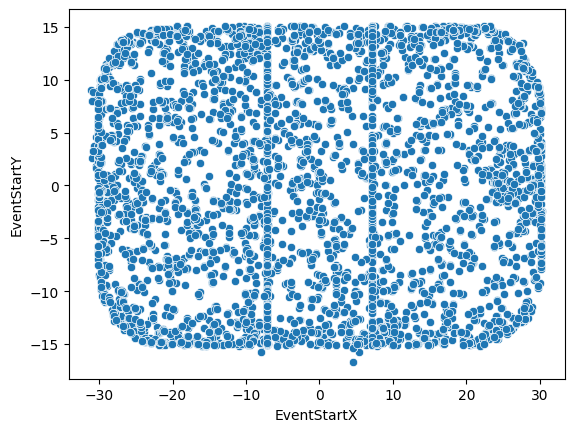

In [19]:
# do a scatterplot of for all events in df
sns.scatterplot(x="EventStartX", y="EventStartY", data=df)

In [20]:
dfSnapshot = df[2652:2676]
dfSnapshot

,Period,MatchClock,Timestamp,EventType,TeamStrengthType,TeamStrength,HomeGoalieOnIce,AwayGoalieOnIce,EventPosition,EventStartCoordinate,...,StartPlayerDirection9,StartPlayerDirection10,StartPlayerDirection11,StartPlayerDirection12,EventStartX,EventStartY,EventEndX,EventEndY,RinkX,RinkY
2652,2,988,1_70403E+12,Faceoff,FullStrength,5v5,True,True,NeutralZone,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2653,2,988,1_70403E+12,PuckControl,FullStrength,5v5,True,True,NeutralZone,"-0.3,0",...,NaN,NaN,NaN,NaN,-0.3,0.0,6.1,-1.2,-0.98499,0.000
2654,2,990,1_70403E+12,PuckControl,FullStrength,5v5,True,True,NeutralZone,"6.1,-1.2",...,NaN,NaN,NaN,NaN,6.1,-1.2,7.3,-4.4,20.02813,-3.936
2655,2,990,1_70403E+12,BluelineCrossing,FullStrength,5v5,True,True,AwayTeamZone,"7.2,-3.2",...,"0.43,-0.903","0.789,0.614","-0.966,-0.257","0.453,0.892",7.2,-3.2,NaN,NaN,23.63976,-10.496
2656,2,990,1_70403E+12,Pass,FullStrength,5v5,True,True,AwayTeamZone,"7.4,-4.6",...,"0.504,-0.863","0.292,0.957","-0.972,-0.237","0.595,0.804",7.4,-4.6,5.7,13.5,24.29642,-15.088
2657,2,990,1_70403E+12,PuckControl,FullStrength,5v5,True,True,AwayTeamZone,"7.3,-4.4",...,NaN,NaN,NaN,NaN,7.3,-4.4,5.7,13.5,23.96809,-14.432
2658,2,990,1_70403E+12,BluelineCrossing,FullStrength,5v5,True,True,AwayTeamZone,"7.2,-3.9",...,"0.471,-0.882","0.153,0.988","-0.968,-0.251","0.604,0.797",7.2,-3.9,NaN,NaN,23.63976,-12.792
2659,2,991,1_70403E+12,PuckControl,FullStrength,5v5,True,True,NeutralZone,"5.7,13.5",...,NaN,NaN,NaN,NaN,5.7,13.5,5.2,14.0,18.71481,44.280
2660,2,991,1_70403E+12,Dump,FullStrength,5v5,True,True,NeutralZone,"5.3,13.9",...,"-0.613,-0.79","-0.612,0.791","-0.975,0.221","-0.625,0.78",5.3,13.9,-29.9,8.8,17.40149,45.592
2661,2,992,1_70403E+12,PuckControl,FullStrength,5v5,True,True,NeutralZone,"5.2,14",...,NaN,NaN,NaN,NaN,5.2,14.0,-30.0,7.7,17.07316,45.920


In [40]:
# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['EventType', 'PuckControlState', 'EventPrimaryPlayerId', 'EventPrimaryPlayerName', 'EventSecondaryPlayerId'])

# Loop through the DataFrame
i = 0
success = 0
fail = 0

for index, row in dfSnapshot.iterrows():
    # Correct the condition to check both 'AwayControl' and 'HomeControl'
    if row['PuckControlState'] in ['AwayControl', 'HomeControl']: 
        # Create a temporary DataFrame for the current row
        temp_df = pd.DataFrame({
            'EventType': [row['EventType']],
            'PuckControlState': [row['PuckControlState']],
            'EventPrimaryPlayerId': [row['EventPrimaryPlayerId']],
            'EventPrimaryPlayerName': [row['EventPrimaryPlayerName']]
        })

        # Use pd.concat() to append the row to result_df
        result_df = pd.concat([result_df, temp_df], ignore_index=True)
        
        i += 1  # Increment the counter for control events

    # Handle successful passes
    elif row['EventType'] == 'Pass' and row['PassResult'] == 'Successful':
        temp_df = pd.DataFrame({
            'EventType': [row['EventType']],
            'PuckControlState': [row['PuckControlState']],
            'EventPrimaryPlayerId': [row['EventPrimaryPlayerId']],
            'EventPrimaryPlayerName': [row['EventPrimaryPlayerName']],
            'EventSecondaryPlayerId': [row['EventSecondaryPlayerId']],  # Successful pass, include secondary player
            'EventSecondaryPlayerName': [row['EventSecondaryPlayerName']]
        })

        result_df = pd.concat([result_df, temp_df], ignore_index=True)
        success += 1  # Increment the counter for successful passes

    # Handle failed passes
    elif row['EventType'] == 'Pass' and row['PassResult'] == 'Failed':
        temp_df = pd.DataFrame({
            'EventType': [row['EventType']],
            'PuckControlState': [row['PuckControlState']],
            'EventPrimaryPlayerId':     [row['EventPrimaryPlayerId']],
            'EventPrimaryPlayerName':   [row['EventPrimaryPlayerName']],
            'EventSecondaryPlayerId':   ['Null']
            }, ignore_index=True)
        fail= fail+1

C:\Users\simon\AppData\Local\Temp\ipykernel_20212\2796405637.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, temp_df], ignore_index=True)
C:\Users\simon\AppData\Local\Temp\ipykernel_20212\2796405637.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, temp_df], ignore_index=True)


In [41]:
result_df

,EventType,PuckControlState,EventPrimaryPlayerId,EventPrimaryPlayerName,EventSecondaryPlayerId,EventSecondaryPlayerName
0,PuckControl,AwayControl,888052792.0,#24 Libor Hajek,NaN,NaN
1,Pass,NaN,888052792.0,#24 Libor Hajek,888048202.0,#65 Martin Bucko
2,PuckControl,AwayControl,NaN,NaN,NaN,NaN
3,PuckControl,AwayControl,888048202.0,#65 Martin Bucko,NaN,NaN
4,PuckControl,HomeControl,153207.0,#20 Michael Fora,NaN,NaN
5,PuckControl,AwayControl,888052795.0,#69 Lukas Radil,NaN,NaN
6,Pass,NaN,888052795.0,#69 Lukas Radil,888047300.0,#90 Robert Kousal
7,PuckControl,AwayControl,NaN,NaN,NaN,NaN
8,PuckControl,AwayControl,888047300.0,#90 Robert Kousal,NaN,NaN
9,PuckControl,HomeControl,150983.0,#29 Sandro Aeschlimann,NaN,NaN
